<a href="https://colab.research.google.com/github/gabrieladamasceno/Attacks_5G/blob/main/MLP_Multiclasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Acessar dataset
drive.mount('/content/gdrive')

# Carregar o dataset
encoded = pd.read_csv("/content/gdrive/MyDrive/Datasets/Attacks/Encoded/Encoded.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [75]:
pip install imbalanced-learn


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [77]:
# Usando shape
num_amostras = encoded.shape[0]
print(f"Número de amostras: {num_amostras}")

# Usando len()
num_amostras_len = len(encoded)
print(f"Número de amostras (usando len): {num_amostras_len}")

Número de amostras: 1215890
Número de amostras (usando len): 1215890


In [78]:
# Exibir os nomes de todas as colunas
colunas = encoded.columns.tolist()  # Converte o Index em uma lista
print("Nomes das colunas:")
for coluna in colunas:
    print(coluna)

Nomes das colunas:
Unnamed: 0
Seq
Dur
RunTime
Mean
Sum
Min
Max
sTos
dTos
sTtl
dTtl
sHops
dHops
TotPkts
SrcPkts
DstPkts
TotBytes
SrcBytes
DstBytes
Offset
sMeanPktSz
dMeanPktSz
Load
SrcLoad
DstLoad
Loss
SrcLoss
DstLoss
pLoss
SrcGap
DstGap
Rate
SrcRate
DstRate
SrcWin
DstWin
sVid
dVid
SrcTCPBase
DstTCPBase
TcpRtt
SynAck
AckDat
Label
Attack Type
Attack Tool
 *        
 *    V   
 *    f   
 e        
 e    f   
 e &      
 e *      
 e d      
 e g      
 e i      
 e r      
 e s      
 eU       
e        
arp
icmp
ipv6-icmp
llc
lldp
sctp
tcp
udp
ACC
CON
ECO
FIN
INT
NRS
REQ
RSP
RST
TST
URP
Shutdown
Start
Status
39
4
52
54
af11
af12
af41
cs0
cs4
cs6
cs7
ef
nan


In [79]:
# Selecionar apenas colunas numéricas
numeric_cols = encoded.select_dtypes(include=['number']).columns

# Aplicar a suavização apenas nas colunas numéricas
for col in numeric_cols:
    encoded[col] = encoded[col].fillna(encoded[col].mean())

In [80]:
# columns with null values

columns_null = []
columns = encoded.columns
for column in columns:
    c = encoded[column].isnull().sum()
    if c != 0:
        print(column, 'has {} null values'.format(c))
        columns_null.append(column)

In [81]:
encoded['Attack Type'].unique()

array(['Benign', 'SYNScan', 'TCPConnectScan', 'UDPScan', 'ICMPFlood',
       'UDPFlood', 'SYNFlood', 'HTTPFlood', 'SlowrateDoS'], dtype=object)

In [82]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Definir as features que você deseja usar
features = ['tcp', 'AckDat', 'sHops', 'Seq', 'RST', 'TcpRtt', 'REQ', 'dMeanPktSz', 'Offset',
            'CON', 'FIN', 'sTtl', 'e        ', 'INT', 'Mean', 'Status', 'icmp', 'SrcTCPBase',
            'sMeanPktSz', 'DstLoss', 'Loss', 'dTtl', 'SrcBytes', 'TotBytes']

# Separar as features e os rótulos
X = encoded[features]  # Usar apenas as colunas selecionadas

X_train = transformer.fit_transform(training_data[features])  # Transformar as features de treinamento
X_test = transformer.transform(test_data[features])  # Transformar as features de teste

# Definir as classes zero-day
zero_day_classes = ['SlowrateDoS']

# Separar o conjunto de treinamento (sem zero-day) e o conjunto de teste (com zero-day e não zero-day)
training_data = encoded[~encoded['Attack Type'].isin(zero_day_classes)]  # Excluir zero-day do treinamento
test_data = encoded  # Incluir todas as classes (com e sem zero-day) no teste

# Definir as classes do conjunto de treinamento e do conjunto de teste
train_classes = np.unique(training_data['Attack Type'])
test_classes = np.unique(test_data['Attack Type'])

# Mostrar as classes nos conjuntos de treinamento e teste
print("Classes no conjunto de treinamento:")
print(train_classes)

print("\nClasses no conjunto de teste:")
print(test_classes)

# Criar o LabelEncoder e ajustar em todas as classes (com zero-day e não zero-day)
le = LabelEncoder()

# Ajustar o LabelEncoder com todas as classes (não apenas as de treino)
le.fit(np.unique(encoded['Attack Type']))  # Ajustando para todas as classes (com e sem zero-day)

# Codificar os rótulos do conjunto de treinamento
y_train_encoded = le.transform(training_data['Attack Type'])

# Codificar os rótulos do conjunto de teste (agora incluindo zero-day)
y_test_encoded = le.transform(test_data['Attack Type'])

# Verificar as classes ajustadas pelo LabelEncoder
print("\nClasses ajustadas pelo LabelEncoder:")
print(le.classes_)

# Verificar as codificações para o conjunto de treinamento e teste
print("\nRótulos de treinamento codificados:")
print(np.unique(y_train_encoded))

print("\nRótulos de teste codificados:")
print(np.unique(y_test_encoded))


Classes no conjunto de treinamento:
['Benign' 'HTTPFlood' 'ICMPFlood' 'SYNFlood' 'SYNScan' 'TCPConnectScan'
 'UDPFlood' 'UDPScan']

Classes no conjunto de teste:
['Benign' 'HTTPFlood' 'ICMPFlood' 'SYNFlood' 'SYNScan' 'SlowrateDoS'
 'TCPConnectScan' 'UDPFlood' 'UDPScan']

Classes ajustadas pelo LabelEncoder:
['Benign' 'HTTPFlood' 'ICMPFlood' 'SYNFlood' 'SYNScan' 'SlowrateDoS'
 'TCPConnectScan' 'UDPFlood' 'UDPScan']

Rótulos de treinamento codificados:
[0 1 2 3 4 6 7 8]

Rótulos de teste codificados:
[0 1 2 3 4 5 6 7 8]


In [85]:
# Dividir os dados em treino e teste com 80% para treino e 20% para teste
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X,  # Features
    le.transform(encoded['Attack Type']),  # Rótulos codificados
    test_size=0.3,  # 30% para o conjunto de teste
    random_state=42,  # Semente para reprodutibilidade
    stratify=encoded['Attack Type']  # Para garantir que as proporções das classes sejam mantidas
)

In [86]:
print("Amostras de treino:", len(y_train_encoded))
print("Amostras de teste:", len(y_test_encoded))

Amostras de treino: 851123
Amostras de teste: 364767


In [87]:
import psutil
import time
from keras.callbacks import Callback

# Função para monitorar recursos
def monitor_resource_usage():
    process = psutil.Process()
    memory_info = process.memory_info()
    cpu_percent = psutil.cpu_percent(interval=0.1)  # Monitorar uso da CPU com intervalo de 0.1 segundos
    memory_usage_mb = memory_info.rss / (1024 * 1024)  # Convertendo bytes para MB
    return cpu_percent, memory_usage_mb

# Callback personalizado para monitorar CPU e memória
class ResourceMonitor(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        # Antes da época começar
        self.start_time = time.time()
        self.start_cpu, self.start_memory = monitor_resource_usage()
        print(f"\n[Início da Época {epoch + 1}]")
        print(f"CPU inicial: {self.start_cpu:.2f}%, Memória inicial: {self.start_memory:.2f} MB")

    def on_epoch_end(self, epoch, logs=None):
        # Após a época terminar
        end_time = time.time()
        end_cpu, end_memory = monitor_resource_usage()
        elapsed_time = end_time - self.start_time
        memory_diff = end_memory - self.start_memory

        print(f"[Fim da Época {epoch + 1}]")
        print(f"CPU final: {end_cpu:.2f}%, Memória consumida: {memory_diff:.2f} MB, Tempo gasto: {elapsed_time:.2f} segundos")

# Instanciar o callback
resource_monitor = ResourceMonitor()

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Verifique o número de classes
num_classes = len(np.unique(y_test_encoded))  # y_train_encoded já contém os rótulos codificados

# Certifique-se de que os rótulos são inteiros e não one-hot encoded
y_train = y_train_encoded  # Rótulos de treino (inteiros)
y_test = y_test_encoded  # Rótulos de teste (inteiros)

# Criar o modelo sequencial
model = Sequential()

# Adicionar a camada de entrada com regularização L2
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1],
                kernel_regularizer=regularizers.l2(0.01)))  # Regularização L2
model.add(Dropout(0.5))  # Regularização com Dropout
model.add(BatchNormalization())  # Normalização em lote

# Adicionar camada oculta com regularização
model.add(Dense(64, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))  # Regularização L2
model.add(Dropout(0.5))  # Regularização com Dropout
model.add(BatchNormalization())  # Normalização em lote

# Camada de saída
model.add(Dense(num_classes, activation='softmax'))  # Saída com 'softmax' para múltiplas classes

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Treinamento do modelo
history = model.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),
    callbacks=[early_stopping, resource_monitor]
)


[Início da Época 1]
CPU inicial: 0.60%, Memória inicial: 6456.87 MB
Epoch 1/20
26583/26598 [============================>.] - ETA: 0s - loss: 1.2805 - accuracy: 0.4333[Fim da Época 1]
CPU final: 0.60%, Memória consumida: -301.09 MB, Tempo gasto: 72.88 segundos
26598/26598 [==============================] - 73s 3ms/step - loss: 1.2805 - accuracy: 0.4333 - val_loss: 1.3563 - val_accuracy: 0.4026

[Início da Época 2]
CPU inicial: 0.40%, Memória inicial: 6155.79 MB
Epoch 2/20
26580/26598 [============================>.] - ETA: 0s - loss: 1.2797 - accuracy: 0.4176[Fim da Época 2]
CPU final: 0.60%, Memória consumida: 8.62 MB, Tempo gasto: 71.94 segundos
26598/26598 [==============================] - 72s 3ms/step - loss: 1.2797 - accuracy: 0.4175 - val_loss: 1.3707 - val_accuracy: 0.3993

[Início da Época 3]
CPU inicial: 0.00%, Memória inicial: 6164.41 MB
Epoch 3/20
26575/26598 [============================>.] - ETA: 0s - loss: 1.3234 - accuracy: 0.4081[Fim da Época 3]
CPU final: 2.10%, Memó

11399/11399 [==============================] - 15s 1ms/step
Classes em y_test: [0 1 2 3 4 5 6 7 8]
Classes em y_pred: [0 1 7]


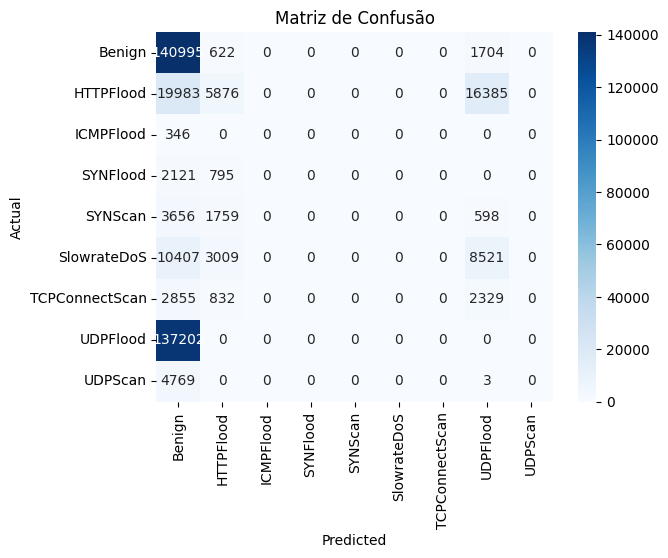

                precision    recall  f1-score   support

        Benign       0.44      0.98      0.61    143321
     HTTPFlood       0.46      0.14      0.21     42244
     ICMPFlood       0.00      0.00      0.00       346
      SYNFlood       0.00      0.00      0.00      2916
       SYNScan       0.00      0.00      0.00      6013
   SlowrateDoS       0.00      0.00      0.00     21937
TCPConnectScan       0.00      0.00      0.00      6016
      UDPFlood       0.00      0.00      0.00    137202
       UDPScan       0.00      0.00      0.00      4772

      accuracy                           0.40    364767
     macro avg       0.10      0.12      0.09    364767
  weighted avg       0.22      0.40      0.26    364767



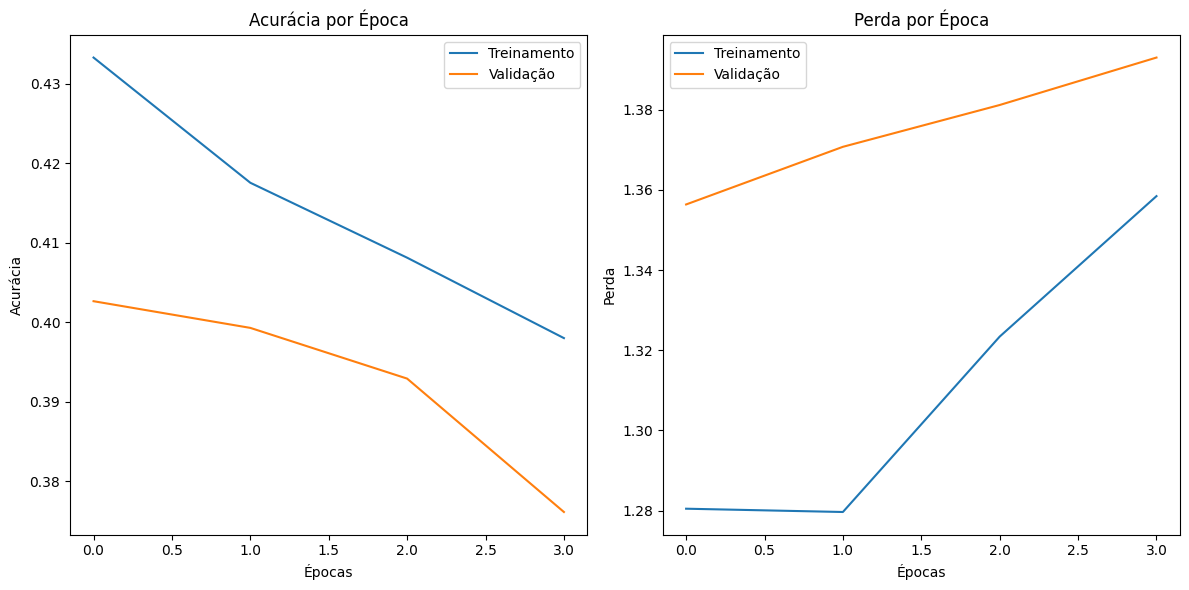

11399/11399 [==============================] - 15s 1ms/step


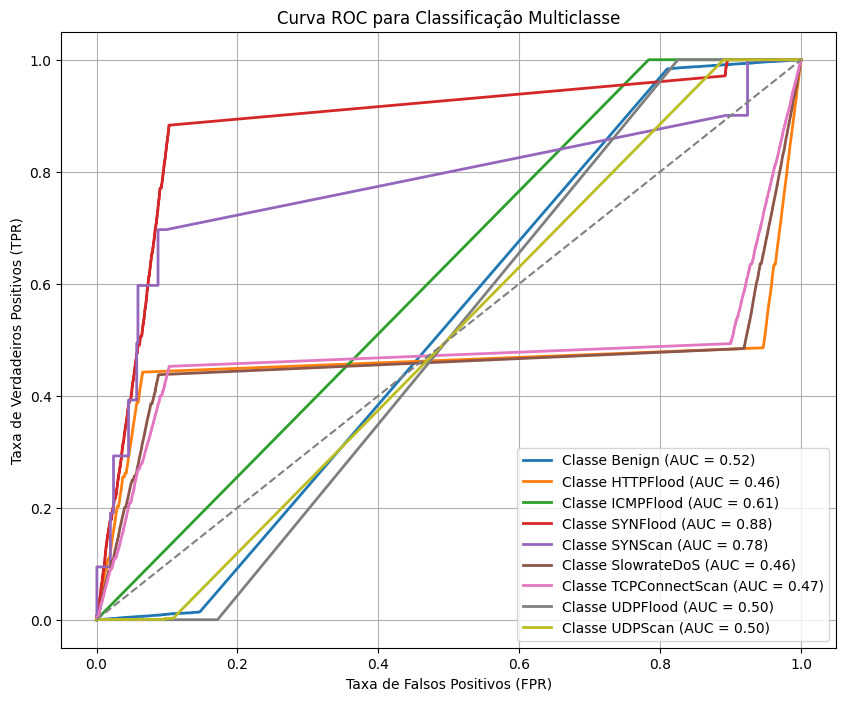

In [93]:
# Gerar previsões para o conjunto de teste
y_pred_prob = model.predict(X_test)  # Probabilidades para cada classe

# Converter as probabilidades para classes
y_pred_classes = np.argmax(y_pred_prob, axis=1)  # A classe com a maior probabilidade

# Certifique-se de que y_test_classes e y_pred_classes estão em formato inteiro
# Verifique os valores únicos em y_test_classes para garantir que a variável contém múltiplas classes
print("Classes em y_test:", np.unique(y_test_encoded))
print("Classes em y_pred:", np.unique(y_pred_classes))

# Definir as classes de ataque
attack_types = ['Benign', 'HTTPFlood', 'ICMPFlood', 'SYNFlood', 'SYNScan', 'SlowrateDoS',
                'TCPConnectScan', 'UDPFlood', 'UDPScan']

# Matriz de Confusão
cm = confusion_matrix(y_test_encoded, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=attack_types, yticklabels=attack_types)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

# Relatório detalhado
print(classification_report(y_test_encoded, y_pred_classes, target_names=attack_types, labels=list(range(num_classes)), zero_division=0))

# Gráfico de Acurácia e Perda
plt.figure(figsize=(12, 6))

# Acurácia de treino
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda por Época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

# AUC - Curva ROC para cada classe
# Binarizar y_test_classes para calcular a AUC
y_test_bin = label_binarize(y_test_encoded, classes=[i for i in range(num_classes)])  # Binarizar y_test
y_pred_prob = model.predict(X_test)  # Obter as probabilidades preditas

# Plotar a curva ROC para cada classe
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Classe {attack_types[i]} (AUC = {roc_auc:.2f})')

# Adicionar a diagonal (caso aleatório)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Definir título e labels
plt.title('Curva ROC para Classificação Multiclasse')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# AUC - Curva ROC Micro
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr, tpr)